In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import pickle

In [3]:
def read_df(filename_path):
    df = pd.read_parquet(filename_path)
    df['duration'] = (df.lpep_dropoff_datetime - df.lpep_pickup_datetime).apply(lambda x:x.total_seconds()/60)
    df = df[(df.duration >= 1) & (df.duration <= 60)]
    numerical = ['trip_distance']
    categorical = ['PULocationID','DOLocationID']
    df[categorical] = df[categorical].astype(str)
    df['PU_DO'] = df['PULocationID'] + '_' + df['DOLocationID']
    return df

In [4]:
df_train = read_df('../data/green_tripdata_2022-02.parquet')
df_valid = read_df('../data/green_tripdata_2022-01.parquet')

In [5]:
len(df_train),len(df_valid)

(66097, 59603)

In [6]:
numerical = ['trip_distance']
categorical = ['PU_DO']
dv = DictVectorizer()
target = 'duration'

train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dicts)
valid_dicts = df_valid[categorical + numerical].to_dict(orient = 'records')
X_valid = dv.transform(valid_dicts)
X_valid

<59603x6795 sparse matrix of type '<class 'numpy.float64'>'
	with 115793 stored elements in Compressed Sparse Row format>

In [7]:
target = 'duration'
y_train = df_train[target].values
y_valid = df_valid[target].values



In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
mean_squared_error(y_valid,y_pred,squared = False)


6.745010218323722

In [28]:
with open('../models/lin_reg.bin','wb') as f_out:
    pickle.dump((dv,lr),f_out)

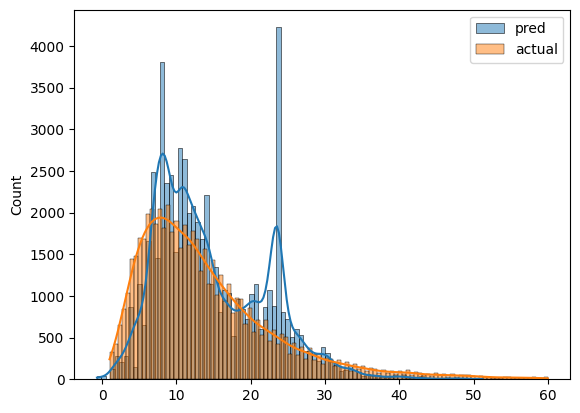

In [30]:
sns.histplot(y_pred,label = 'pred',kde = True)
sns.histplot(y_valid, label = 'actual',kde = True)
plt.legend()
